# Exercise 1 - Getting Started

## Objectives
- To become familiar with Python and Jupyter Notebooks
- To be able to generate discrete signals in Python 
- To calculate the energy/power of a signal in Python

## Instructions
- At the start of each exercise, run all code before you begin. In the toolbar above, click Cell > Run All


In [7]:
import os
os.makedirs('results/ex1', exist_ok=True)

## Lab Exercise

### Sinusoidal Signals
A continuous-time sinusoid is given by $x(t)=A\sin(2\pi f t +\phi)=A\sin(\omega t +\phi)$, where $A$ is the amplitude, $t$ is time in seconds, $f$ is the frequency in Hertz (or $\omega$ in radians), and $\phi$ is the initial phase in radians. 

Because Python is a numerical computing tool, we can plot functions numerically over a defined range of values. Now let us create a plot of a sine wave with a frequency, $f$, of 1 KHz using $N=128$ data points for $0\leq t<5$ ms. 

---

**Question 1.1** Before plotting, calculate the expected number of cycles of sine wave.

To check your answer, let us now plot the sine wave. In Python you can create a vector, `t`, with 128 elements by running code in the following cell:

In [8]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal

# define  constants
fsig = 1000
Nsamp = 128
t = np.linspace(0,0.005,Nsamp,endpoint=False)

>**GTA Tip**
>
>In Python:
>- You do not need to declare variables like in C++
>- Anything between <code>#</code> and newline is a comment
>- The result of a statement can be printed with the <code>print()</code> command
>- There are several ways in Python you can use to create a vector. The first way is used above: <code>linspace(start,end,no_of_points,endpoint)</code> endpoint is a flag to indicate if the endpoint should be included in the vector.
>- Another way uses the <code>np.arange(start, end, increment)</code> command and <code>increment=1</code> by default. Therefore, <code>np.arange(0, 5)</code> will create a row vector containing five elements  vector $x=[0\: 1\: 2\: 3\: 4]$.
>- Check out the documentation: https://numpy.org/doc/stable/reference/

Sometimes, it can be useful to check the dimension(s) of matrices. This can be done using the `np.shape(x)` command which will report the dimension(s) of `x` as row by column. Let us now check the dimension(s) of `t`:

In [9]:
print('Dimension(s) of t:')
print(np.shape(t))
print('\n') # \n creates a newline
print('t:')
print(np.round(t,3))

Dimension(s) of t:
(128,)


t:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005]


To create the sine wave $x(t)=\sin(2\pi f t)$, simply execute the next cell.

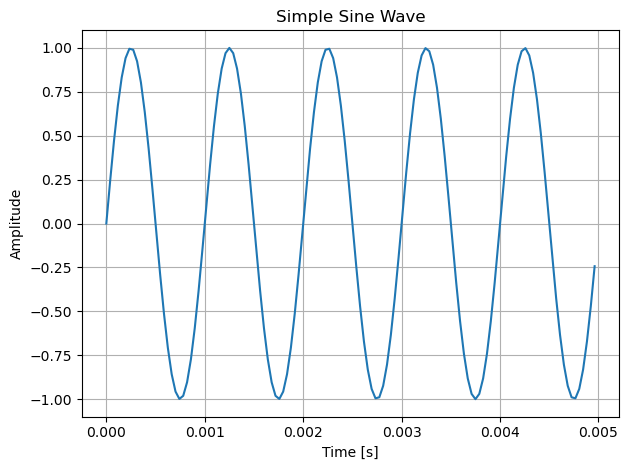

In [10]:
x = np.sin(2*np.pi*fsig*t);

plt = plot_signal(t, x, title='Simple Sine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

>**GTA Tip**
>
>Check that $x$ and $t$ have the same dimensions. Python performs 'broadcasting' so that algorithms can be written more efficiently (see https://numpy.org/doc/stable/user/basics.broadcasting.html).

Since plotting signals will be used many times in this coursework, you have been provided with a plotting function, `plot_signal()`, in the `lab_functions.py` file. To use the function, we need to first import:

```python
from functions.lab_functions import plot_signal
```

To save the plots we have created, we can use the `plt.savefig('title')` command. For example:

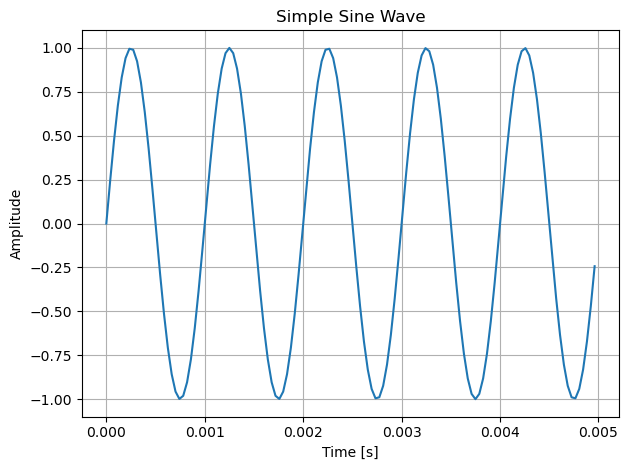

In [11]:
x = np.sin(2*np.pi*fsig*t);

plt = plot_signal(t, x, title='Simple Sine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex1/ex1_simple_sine_save.pdf')
plt.show()

The plot created above, `ex1_simple_sine_save.pdf`, will have also been saved to the `/results/ex1/` folder so you now have a record of the plot.

>**GTA Tip**
>
>You can also plot the sine wave using cross markers for each discrete point by entering the command `plot_signal(t, x, marker='x')` and change the colour of the line to red with `plot_signal(t, x, color='red')`.  Please see an example below.



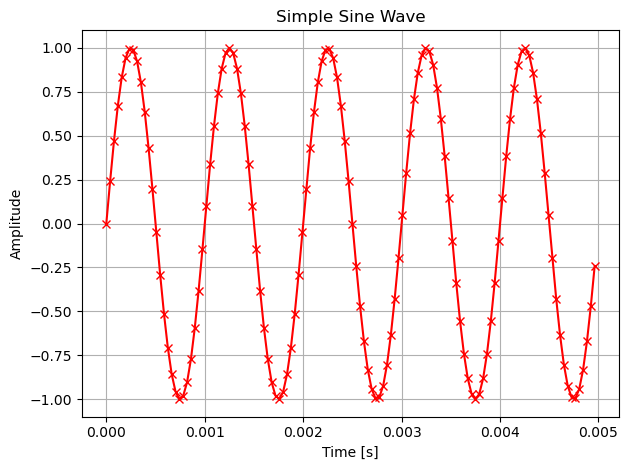

In [12]:
x = np.sin(2*np.pi*fsig*t);

plt = plot_signal(t, x, marker='x', color='red', title='Simple Sine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

### Sampled Sine Wave

Consider a discrete-time sine wave: $x[n]=A\sin(\Omega n +\phi)$ obtained by sampling the continuous-time signal at a sampling rate of $f_s=1/T_s$, where $A$ is the amplitude, $\Omega$ is the normalised angular frequency and $\phi$ is the phase. This is mathematically represented by:

$$x[n]=x(t)|_{t=nT_s}=A\sin(\omega n T_s + \phi) = A \sin(\Omega n + \phi),$$

where $|_{t=nT_s}$ represents the evaluation of $t$ at discrete points $nT_s$ using the following definition.

---
**Definition:**
$$\Omega=\frac{\omega}{f_s} =2\pi\frac{f}{f_s}=2\pi F, \quad \text{where }F=\frac{f}{f_s} \text{ and } \omega = 2\pi f$$

It is common to use $f$ for 'real' frequencies and $\omega$ for 'real' angular frequencies. The scaled versions are $F$ for normalised frequency and $\Omega$ for normalised angular frequency. The unit of $\Omega$ is 'radians per sample' and $F$ is 'cycles per sample'.

---

Now let us create a plot of a sampled sine wave with a frequency, $f$, of 1 KHz and a sampling frequency, $f_s$, of 25.6 kHz, where $N=128$ implies that 128 data points should be generated. 

To create the sine wave  $x[n]=\sin(2\pi \frac{f}{f_s}n)$ , simply execute the next cell

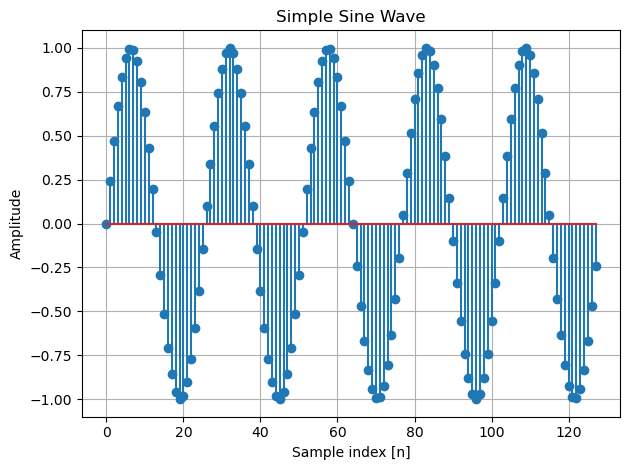

In [13]:
fs = 25600
n = t*fs
x = np.sin(2*np.pi*fsig/fs*n)

plt = plot_signal(n, x, title='Simple Sine Wave', xlabel='Sample index [n]', ylabel='Amplitude',func='stem')
plt.show()

The first 'Simple Sine Wave' figure is a plot of `x` against time `t`. After sampling, however, we obtain a plot of amplitude `x` against sample index `n`.

**Question 1.2** Can you explain the differences between `n` and `t`? What is the range of values of `n`?



**1.2**

*t reperesents continious time and is thus continious and >0*

*n represents the index of the sample - the larger the n the later the sample is collected*

*in this specific example, n ranges from 0 to 128 - in general, n is a bounded integer?*




**Question 1.3** For this sampled sine example, calculate $\omega$, and $\Omega$?


>**GTA Tip**
>
>The output here is plotted as discrete points using the command `plot_signal(n, x)`. You can change the properties of the plot such as marker colour and symbol using `markerfmt` and stem lines using `linefmt`. See an example below and documentation for more information 
(see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html).


**1.3** 

$\Omega$ = 2 $\pi$ / 25.6 Hz

$\omega$ = 2 $\pi$ kHz



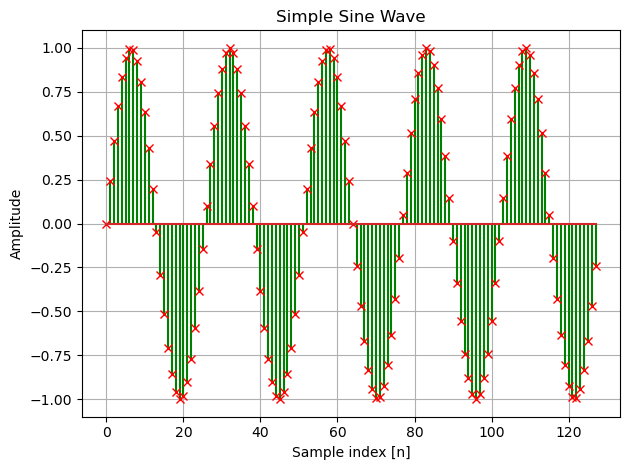

In [14]:
x = np.sin(2*np.pi*fsig/fs*n)

plt = plot_signal(n, x, markerfmt='rx', linefmt='g', title='Simple Sine Wave', xlabel='Sample index [n]', ylabel='Amplitude',func='stem')
plt.show()


Since sine waves are useful waveforms, let us write a function to generate them for any signal frequency, $f$, sampling frequency, $f_s$, and number of samples, $N$. In Python, functions are stored as in file(s) with extension '**.py**'. To make your life easier, we have written this function for you in the `lab_functions.py` file stored in the functions folder.

The `sinegen` function defined in the `lab_functions.py` file is given below:

```python
def sinegen(fs, fsig, Nsamp):
    tsamp = 1/fs
    t = np.linspace(0, Nsamp*tsamp, Nsamp)
    y = np.sin(2*np.pi*fsig*t)
    return t, y
```

**Question 1.4** In the `sinegen` function, how can you use `linspace` instead of `arange` to generate `t`?


To test `sinegen` function, we first need to import it:

```python
from functions.lab_functions import sinegen
```

We can then execute the code using:

```python
t, y = sinegen(fs, fsig, Nsamp)
```

We can now write some code to reproduce the previous plot but this time utilising the `sinegen` function:

**1.4** 

arange(start,end,interval_space) : this function generates values from start to end with each value differing by the interval_space

linspace(start,end,interval_numbers): This function generates *numbers* from start to end such that they differ by an amount that creates 'interval_number' of those numbers.

To get the same result using linspace, instead of putting ts as argument in last columnm, put Nsamp - number of samples you take, ts is calculated form there




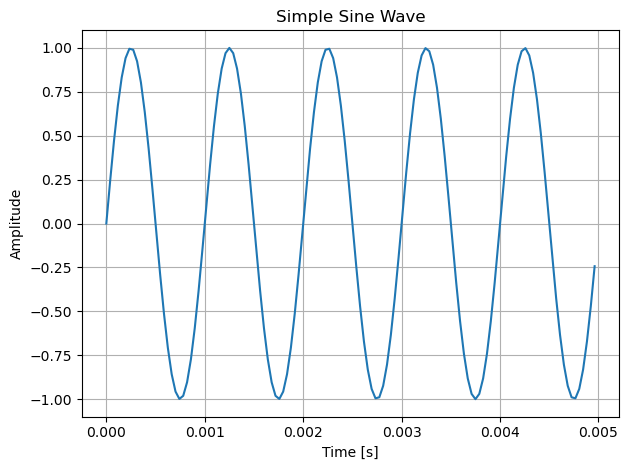

In [21]:
from functions.lab_functions import sinegen
t, y = sinegen(fs, fsig, Nsamp)

plt = plot_signal(t, y, title='Simple Sine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

**Question 1.5** Create a `cosgen` function which generate a cosine wave for any frequency, $f$, sampling frequency, $f_s$, and number of samples, $N$.

In [16]:
# add code here
def cosgen(fs, fsig, Nsamp):
    tsamp = 1/fs
    t = np.linspace(0, Nsamp*tsamp, Nsamp)
    y = np.cos(2*np.pi*fsig*t)
    return t, y

**Question 1.6** Use your `cosgen` function to plot 5 cycles of a cosine of amplitude 1 with normalised angular frequency $\Omega=\frac{\pi}{5}$ rads/sample.

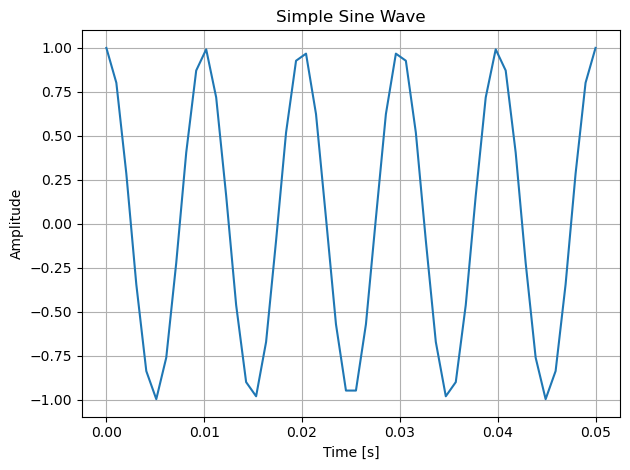

In [23]:
# to get Omega as pi/5 you need f/fs to be 1/10 (f/fs = 1/10)  ->  f = fs/10
# let fs = 1000, f = 100

# if Omega is pi/5  ->  each sample is pi/5 rad apart  ->  ie sample occurs every pi/5 rad  -> 5 cycles contains 10pi rad  
# ->  number of samples needed to get 10pi rad = 10pi / (pi/5) = radians needed total / radians per sample = 50 samples

def cosgen(fs, fsig, Nsamp):
    tsamp = 1/fs
    t = np.linspace(0, Nsamp*tsamp, Nsamp)
    y = np.cos(2*np.pi*fsig*t)
    return t, y

t, y = cosgen(1000, 100, 50)

plt = plot_signal(t, y, title='Simple Sine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

### Power and energy of discete-time signals
In signal processing, it is often useful to calculate the energy or power of a signal. Remember from lectures that signals are energy signals **or** power signals; these are mutually exclusive quantities.

---
**Definition:**
For discrete-time signals with $N$ samples, $x[n]$, 

 $$E=\sum_{n=-\infty}^{\infty}x^2[n] \, \, \, \, \, \, \text{and} \, \, \, \, \, \, P=\lim_{N\rightarrow\infty}\frac{1}{N}\sum_{n=0}^{N-1}x^2[n]$$

**Question 1.7** Use python to calculate the energy or power of your cosine of amplitude 1 with angular frequency $\Omega=\frac{\pi}{5}$ rads/sample.
> **GTA Tip**
>
> In python: 
> - You can obtain the square of an array `x` using `x**2` or `np.square(x)`.
> - To sum all elements of `x`, use `sum(x)` or `np.sum(x)`.
> - You can use `len(x)` or `np.shape(x)` to find the number of elements in `x`.

In [28]:
def cosgen(fs, fsig, Nsamp):
    tsamp = 1/fs
    t = np.linspace(0, Nsamp*tsamp, Nsamp)
    y = np.cos(2*np.pi*fsig*t)
    return t, y

def GetEnergy(signal):
  energy = 0
  
  for sample_n in signal:
    energy += sample_n*sample_n

  return energy


t, x = cosgen(1000, 100, 50)

print(GetEnergy(x))



25.500000000000007


**Question 1.8** Now calculate the energy/power of a cosine of amplitude 1 with angular frequency $\Omega=\pi$ rad/sample. Do you get the same result as before? 
> **GTA Tip**
>
> If you struggle to understand what is happening here, try plotting your cosine or printing out the amplitude of your samples. You can also repeat the exercise for a sine wave and see what changes.
> 
> This question is also found in Exercise 6 of Problem Sheet 1.

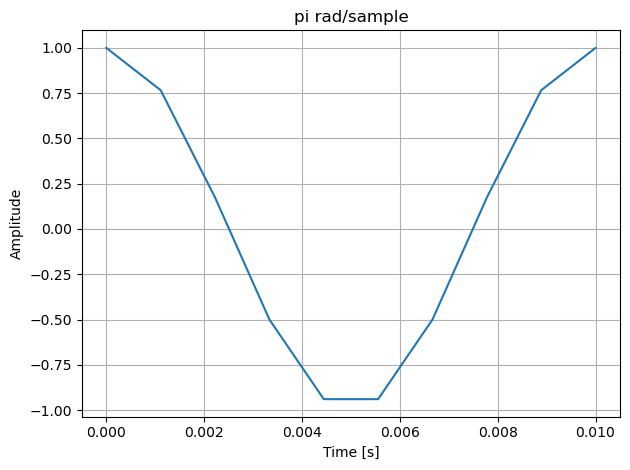

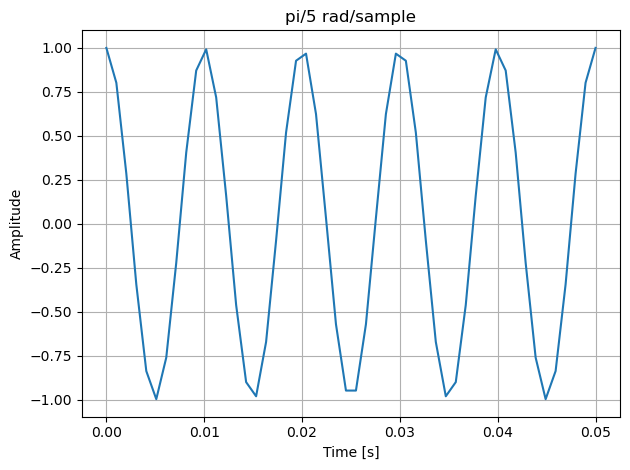

pi rad/sample energy :  5.499999999999999
pi/5 rad/sample energy :  25.500000000000007


: 

In [29]:
# For Omega = pi rad/sample  ->  Number of samples = 10pi/pi = 10
def cosgen(fs, fsig, Nsamp):
    tsamp = 1/fs
    t = np.linspace(0, Nsamp*tsamp, Nsamp)
    y = np.cos(2*np.pi*fsig*t)
    return t, y

def GetEnergy(signal):
  energy = 0
  
  for sample_n in signal:
    energy += sample_n*sample_n

  return energy


t1,y1  = cosgen(1000, 100, 10) #pi rad/sample = Omega
t2,y2  = cosgen(1000, 100, 50) #pi/5 rad/sample = Omega

plt1 = plot_signal(t1, y1, title='pi rad/sample', xlabel='Time [s]', ylabel='Amplitude')
plt1.show()

plt2 = plot_signal(t2, y2, title='pi/5 rad/sample', xlabel='Time [s]', ylabel='Amplitude')
plt2.show()

print('pi rad/sample energy : ', GetEnergy(y1))
print('pi/5 rad/sample energy : ', GetEnergy(y2))

# Through observation you can see that the energy of signal with Omega = pi/5 is 5 times greater than the energy of the signal with Omega = pi
